In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

/Users/xuerongrong/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
boros = gpd.read_file('data/boundary.gpkg')

<AxesSubplot:>

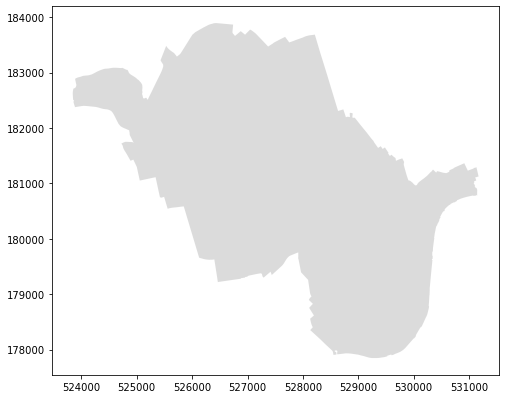

In [3]:
boros.plot(figsize=(8,8), color='lightgrey', alpha=0.8)

In [4]:
domepc = pd.read_csv('data/certificates_domestic.csv', low_memory=False)

In [5]:
domepc.shape

(136866, 92)

In [6]:
domepc.columns

Index(['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'POSTCODE',
       'BUILDING_REFERENCE_NUMBER', 'CURRENT_ENERGY_RATING',
       'POTENTIAL_ENERGY_RATING', 'CURRENT_ENERGY_EFFICIENCY',
       'POTENTIAL_ENERGY_EFFICIENCY', 'PROPERTY_TYPE', 'BUILT_FORM',
       'INSPECTION_DATE', 'LOCAL_AUTHORITY', 'CONSTITUENCY', 'COUNTY',
       'LODGEMENT_DATE', 'TRANSACTION_TYPE', 'ENVIRONMENT_IMPACT_CURRENT',
       'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT',
       'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT',
       'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL',
       'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL',
       'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL',
       'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL',
       'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL',
       'FLAT_TOP_STOREY', 'FLAT_STOREY_COUNT', 'MAIN_HEATING_CONTROLS',
       'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'GLAZED_AREA',
      

In [7]:
coo=['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 
       'POTENTIAL_ENERGY_RATING', 'CURRENT_ENERGY_EFFICIENCY',
       'POTENTIAL_ENERGY_EFFICIENCY', 'PROPERTY_TYPE', 'BUILT_FORM',
       'INSPECTION_DATE', 'LOCAL_AUTHORITY', 'CONSTITUENCY', 'COUNTY',
       'LODGEMENT_DATE', 'TRANSACTION_TYPE', 'ENVIRONMENT_IMPACT_CURRENT',
       'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT',
       'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT',
       'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL',
       'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL',
       'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL',
       'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL',
       'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'FLOOR_LEVEL',
       'FLAT_TOP_STOREY', 'FLAT_STOREY_COUNT', 'MAIN_HEATING_CONTROLS',
       'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'GLAZED_AREA',
       'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES', 'HOTWATER_DESCRIPTION',
       'HOT_WATER_ENERGY_EFF', 'HOT_WATER_ENV_EFF', 'FLOOR_DESCRIPTION',
       'FLOOR_ENERGY_EFF', 'FLOOR_ENV_EFF', 'WINDOWS_DESCRIPTION',
       'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF', 'WALLS_DESCRIPTION',
       'WALLS_ENERGY_EFF', 'WALLS_ENV_EFF', 'SECONDHEAT_DESCRIPTION',
       'SHEATING_ENERGY_EFF', 'SHEATING_ENV_EFF', 'ROOF_DESCRIPTION',
       'ROOF_ENERGY_EFF', 'ROOF_ENV_EFF',
       'MAINHEAT_ENERGY_EFF', 'MAINHEAT_ENV_EFF', 'MAINHEATCONT_DESCRIPTION',
       'MAINHEATC_ENERGY_EFF', 'MAINHEATC_ENV_EFF', 'LIGHTING_DESCRIPTION',
       'LIGHTING_ENERGY_EFF', 'LIGHTING_ENV_EFF',
       'WIND_TURBINE_COUNT', 'HEAT_LOSS_CORRIDOR', 'UNHEATED_CORRIDOR_LENGTH',
       'FLOOR_HEIGHT', 'PHOTO_SUPPLY', 'SOLAR_WATER_HEATING_FLAG',
       'MECHANICAL_VENTILATION', 'ADDRESS', 'LOCAL_AUTHORITY_LABEL',
       'CONSTITUENCY_LABEL', 'POSTTOWN', 'CONSTRUCTION_AGE_BAND',
       'LODGEMENT_DATETIME', 'TENURE', 'FIXED_LIGHTING_OUTLETS_COUNT',
       'LOW_ENERGY_FIXED_LIGHT_COUNT', 'UPRN_SOURCE']

In [8]:
domepc = domepc.drop(coo, axis=1)
domepc.columns

Index(['POSTCODE', 'BUILDING_REFERENCE_NUMBER', 'CURRENT_ENERGY_RATING',
       'MAINS_GAS_FLAG', 'MAINHEAT_DESCRIPTION', 'MAIN_FUEL', 'UPRN'],
      dtype='object')

In [9]:
domepc.head(3)

,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,MAINS_GAS_FLAG,MAINHEAT_DESCRIPTION,MAIN_FUEL,UPRN
0,W2 6DE,5917607278,C,Y,"Boiler and radiators, mains gas",mains gas (not community),1.003357e+10
1,W9 1LF,7273449668,D,Y,"Boiler and radiators, mains gas",mains gas - this is for backwards compatibilit...,1.000228e+11
2,W1G 8TJ,9110917378,B,Y,"Boiler and underfloor heating, mains gas",mains gas (not community),1.003363e+10


In [10]:
total = domepc.isnull().sum().sort_values(ascending=False)
percent = (domepc.isnull().sum()/domepc.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
MAINS_GAS_FLAG,13542,0.098943
UPRN,13301,0.097183
MAIN_FUEL,1002,0.007321
MAINHEAT_DESCRIPTION,1,0.000007
POSTCODE,0,0.000000


In [11]:
#it removes duplicate rows based on all columns
domepc.drop_duplicates(inplace=True)

In [12]:
domepc.shape

(132076, 7)

In [13]:
print(domepc['UPRN'].nunique())
print(domepc['BUILDING_REFERENCE_NUMBER'].nunique())

86576
107107


In [14]:
uprncsv = pd.read_csv('data/osopenuprn_202206.csv')

In [15]:
uprncsv.sample(3)

,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE
22202314,10095831680,388801.37,105250.39,50.846656,-2.160429
28144963,100040799561,403605.00,92452.00,50.731663,-1.950277
18260441,10033580322,529231.00,180878.00,51.512059,-0.139081


In [16]:
epcuprn = pd.merge(domepc, uprncsv, how="left",on='UPRN')
print(epcuprn.shape)

(132076, 11)


In [17]:
total = epcuprn.isnull().sum().sort_values(ascending=False)
percent = (domepc.isnull().sum()/epcuprn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MAINS_GAS_FLAG,13166,0.099685
X_COORDINATE,12873,NaN
Y_COORDINATE,12873,NaN
LATITUDE,12873,NaN
LONGITUDE,12873,NaN
UPRN,12872,0.097459
MAIN_FUEL,996,0.007541
MAINHEAT_DESCRIPTION,1,0.000008
POSTCODE,0,0.000000
BUILDING_REFERENCE_NUMBER,0,0.000000


In [18]:
print(domepc['UPRN'].nunique())
print(epcuprn['UPRN'].nunique())

86576
86576


In [19]:
naepcuprn = epcuprn.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [20]:
print(naepcuprn.shape)

(119203, 11)


In [21]:
print(naepcuprn['BUILDING_REFERENCE_NUMBER'].nunique())
print(naepcuprn['UPRN'].nunique())

96469
86575


In [22]:
geoepcuprn = gpd.GeoDataFrame(naepcuprn, 
      geometry=gpd.points_from_xy(naepcuprn['LONGITUDE'], naepcuprn['LATITUDE'], crs='epsg:4326'))
geoepcuprn = geoepcuprn.to_crs('epsg:27700')

In [23]:
geoepcuprn.sample(3)

,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,MAINS_GAS_FLAG,MAINHEAT_DESCRIPTION,MAIN_FUEL,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
52437,W2 4SN,1717311578,E,Y,"Boiler and radiators, mains gas",mains gas (not community),1.000228e+11,525729.0,180865.0,51.512731,-0.189524,POINT (525730.692 180865.206)
74556,W9 1PF,1252179868,C,N,"Boiler and radiators, mains gas",mains gas (not community),1.000228e+11,525777.0,182999.0,51.531899,-0.188072,POINT (525778.718 182999.257)
19734,WC2B 4AH,5276764678,C,Y,"Boiler and radiators, mains gas",mains gas (not community),1.003355e+10,530517.0,181133.0,51.514055,-0.120465,POINT (530518.768 181133.222)


In [24]:
geoepcuprn = geoepcuprn.drop(geoepcuprn[(geoepcuprn.LONGITUDE > -0.1)].index, axis=0)
print(f"Data frame is {geoepcuprn.shape[0]:,} x {geoepcuprn.shape[1]}")
print(f"Number of unique UPRN is {geoepcuprn['UPRN'].nunique()}")

Data frame is 119,192 x 12
Number of unique UPRN is 86569


<AxesSubplot:>

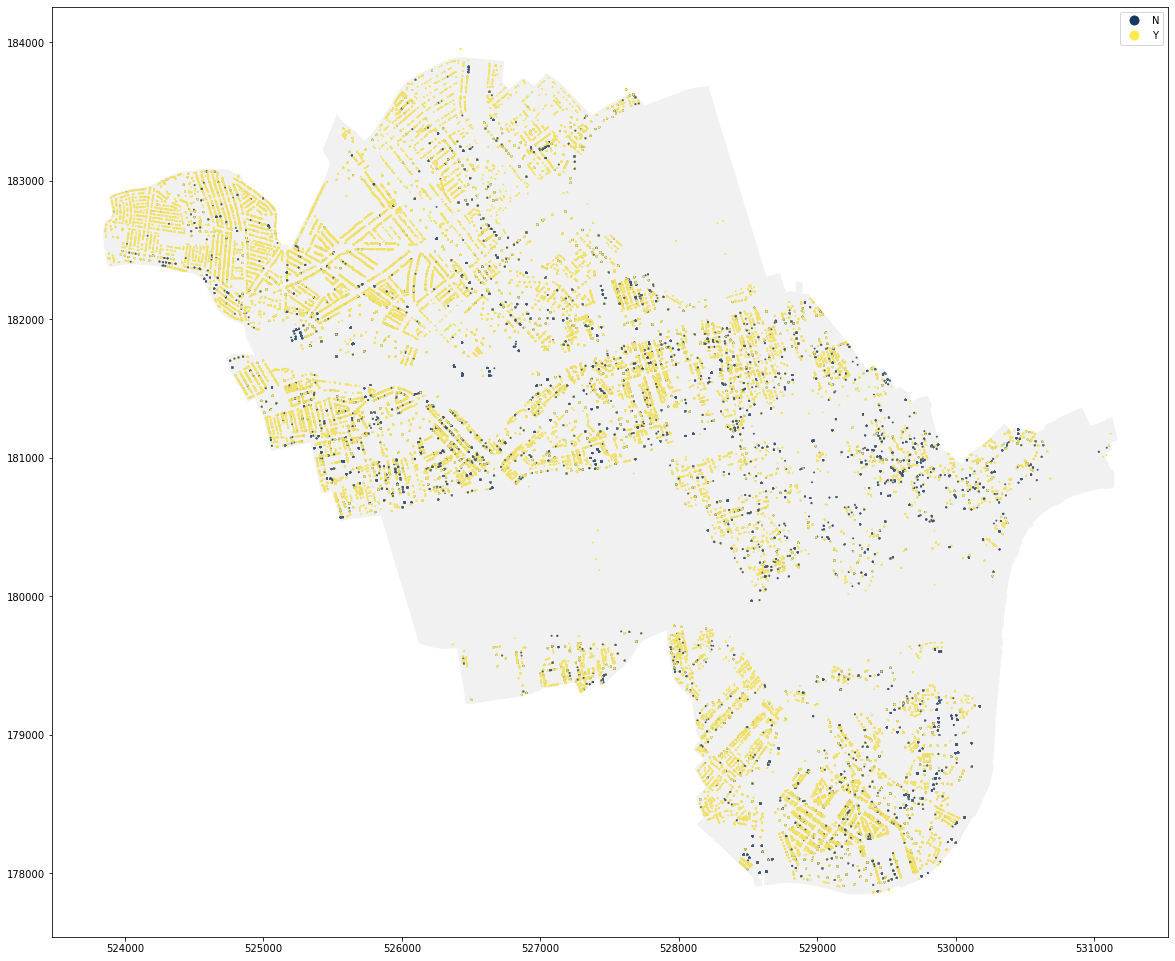

In [25]:
ax = geoepcuprn.plot(column='MAINS_GAS_FLAG',cmap='cividis', markersize=1, legend=True, alpha=0.9, figsize=(20,20))
#green.plot(color='olive', alpha=0.6, ax=ax)
boros.plot(color='lightgrey', alpha=0.3, ax=ax)

In [26]:
count = geoepcuprn.groupby('MAIN_FUEL')['UPRN'].count()
print("Frequency of MAIN_FUEL:\n", count)

Frequency of MAIN_FUEL:
 MAIN_FUEL
B30D (community)                                                                                    12
B30K (not community)                                                                                 1
Electricity: electricity, unspecified tariff                                                      1373
Gas: mains gas                                                                                     116
INVALID!                                                                                            75
LPG (community)                                                                                     18
LPG (not community)                                                                                 96
LPG - this is for backwards compatibility only and should not be used                               62
NO DATA!                                                                                          6022
To be used only when there is no heati

In [27]:
count = geoepcuprn.groupby('MAINHEAT_DESCRIPTION')['UPRN'].count()
pd.set_option('display.max_rows', None)  # or 1000
print("Frequency of MAINHEAT_DESCRIPTION:\n", count)

Frequency of MAINHEAT_DESCRIPTION:
 MAINHEAT_DESCRIPTION
Air source heat pump , electric                                                                          4
Air source heat pump fan coil units, electric                                                           18
Air source heat pump fan coil units, electric, Electric underfloor heating, underfloor, electric         1
Air source heat pump, , electric                                                                         4
Air source heat pump, Fan coil units, electric                                                          52
Air source heat pump, Systems with radiators, electric                                                   7
Air source heat pump, Underfloor heating and radiators, pipes in insulated timber floor, electric        1
Air source heat pump, Underfloor heating, pipes in insulated timber floor, electric                     16
Air source heat pump, Underfloor heating, pipes in screed above insulation, electric   

In [28]:
count = geoepcuprn.groupby('MAINS_GAS_FLAG')['UPRN'].count()
print("Frequency of MAINS_GAS_FLAG:\n", count)

Frequency of MAINS_GAS_FLAG:
 MAINS_GAS_FLAG
N    25597
Y    82381
Name: UPRN, dtype: int64


In [29]:
total = geoepcuprn.isnull().sum().sort_values(ascending=False)
percent = (geoepcuprn.isnull().sum()/geoepcuprn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MAINS_GAS_FLAG,11214,0.094083
MAIN_FUEL,491,0.004119
MAINHEAT_DESCRIPTION,1,0.000008
POSTCODE,0,0.000000
BUILDING_REFERENCE_NUMBER,0,0.000000
CURRENT_ENERGY_RATING,0,0.000000
UPRN,0,0.000000
X_COORDINATE,0,0.000000
Y_COORDINATE,0,0.000000
LATITUDE,0,0.000000


In [30]:
geoepcuprn.shape

(119192, 12)

In [31]:
count = geoepcuprn.groupby('CURRENT_ENERGY_RATING')['UPRN'].count()
print("Frequency of CURRENT_ENERGY_RATING:\n", count)

Frequency of CURRENT_ENERGY_RATING:
 CURRENT_ENERGY_RATING
A      106
B    13439
C    47649
D    40037
E    13899
F     3173
G      889
Name: UPRN, dtype: int64


In [32]:
#geoepcuprn.to_file("energy_rating.geojson", driver="GeoJSON")

### MAINHEAT DESCRIPTION MAIN FUEL

In [33]:
domesticheat = geoepcuprn.copy()

In [34]:
#Other
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Boiler and radiators, oil.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Boiler and underfloor heating, oil.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Radiator heating, heat from boilers - oil.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Room heaters, anthracite.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Room heaters, bottled LPG.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Room heaters, coal.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Room heaters, oil.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Room heaters, wood logs.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Room heaters, smokeless fuel.*$)', 'Other(coal,oil,wood,etc.)')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Warm air, oil.*$)', 'Other(coal,oil,wood,etc.)')

/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/488298725.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/488298725.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/488298725.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/488298725.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION

In [35]:
#heat pump
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Air source heat pump.*$)', 'Heat pump')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Exhaust air MEV.*$)', 'Heat pump')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Ground source heat pump.*$)', 'Heat pump')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Exhaust air MEV.*$)', 'Heat pump')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Water source heat pump.*$)', 'Heat pump')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Warm air heat pump.*$)', 'Heat pump')

/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/1714152978.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/1714152978.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/1714152978.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/1714152978.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIP

In [36]:
#community
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Community.*$)', 'Community')

#Gas (99.7% is gas boiler)
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Boiler.*$)', 'Gas')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Radiator heating, heat from boilers - gas.*$)', 'Gas')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Room heaters, mains gas.*$)', 'Gas')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*SAP05.*$)', 'Gas')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Micro-cogeneration.*$)', 'Gas')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Warm air, mains gas.*$)', 'Gas')

#electric
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Electric.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*No system present.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Portable electric.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Radiator heating, electric.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Boiler & underfloor, electric.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Boiler and radiators, electric.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Boiler and underfloor heating, electric.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Room heaters, electric.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Warm air, electric.*$)', 'Electric')
domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
    r'(^.*Warm air , electric.*$)', 'Electric')

/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/2333108086.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/2333108086.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/2333108086.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRIPTION'] = domesticheat.MAINHEAT_DESCRIPTION.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96266/2333108086.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  domesticheat['MAINHEAT_DESCRI

In [37]:
count = domesticheat.groupby('MAINHEAT_DESCRIPTION')['UPRN'].count()
pd.set_option('display.max_rows', None)  # or 1000
print("Frequency of MAINHEAT_DESCRIPTION:\n", count)

Frequency of MAINHEAT_DESCRIPTION:
 MAINHEAT_DESCRIPTION
Community                    32933
Electric                     16386
Gas                          67787
Heat pump                     2043
Other(coal,oil,wood,etc.)       42
Name: UPRN, dtype: int64


In [38]:
count = domesticheat.groupby(['MAINHEAT_DESCRIPTION','CURRENT_ENERGY_RATING'])['UPRN'].count()
pd.set_option('display.max_rows', None)  # or 1000
print("Frequency of MAINHEAT_DESCRIPTION:\n", count)

Frequency of MAINHEAT_DESCRIPTION:
 MAINHEAT_DESCRIPTION       CURRENT_ENERGY_RATING
Community                  A                           71
                           B                         7854
                           C                        14156
                           D                         8689
                           E                         2019
                           F                          142
                           G                            2
Electric                   B                         1030
                           C                         4087
                           D                         4637
                           E                         4014
                           F                         1861
                           G                          757
Gas                        A                           34
                           B                         3979
                           C                 

In [39]:
domesticheat.shape

(119192, 12)

In [40]:
domesticheat = domesticheat.dropna(subset=['MAINHEAT_DESCRIPTION'])
domesticheat.shape

(119191, 12)

In [41]:
domesticheat.head(3)

,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,MAINS_GAS_FLAG,MAINHEAT_DESCRIPTION,MAIN_FUEL,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
0,W2 6DE,5917607278,C,Y,Gas,mains gas (not community),1.003357e+10,526138.0,181113.0,51.514869,-0.183545,POINT (526139.702 181113.208)
1,W9 1LF,7273449668,D,Y,Gas,mains gas - this is for backwards compatibilit...,1.000228e+11,525493.0,182598.0,51.528359,-0.192306,POINT (525494.713 182598.249)
2,W1G 8TJ,9110917378,B,Y,Gas,mains gas (not community),1.003363e+10,528530.0,181625.0,51.518932,-0.148905,POINT (528531.743 181625.233)


In [49]:
heatpump = domesticheat.loc[domesticheat['MAINHEAT_DESCRIPTION'] == 'Heat pump']
heatpump.shape

(2043, 12)

In [50]:
heatpump.to_file("heatpump.geojson", driver="GeoJSON")

In [55]:
newdomesticheat = domesticheat.replace(
    to_replace =["Community"], value = "District Heating").replace(
    to_replace =["Electric"], value = "Electricity").replace(
    to_replace =["Gas"], value = "Natural Gas").replace(
    to_replace =["Other(coal,oil,wood,etc.)"], value = "Other (Oil, LPG, Coal, etc.)").replace(
    to_replace =["Heat pump"], value = "Electricity").copy()

In [56]:
count = newdomesticheat.groupby('MAINHEAT_DESCRIPTION')['UPRN'].count()
pd.set_option('display.max_rows', None)  # or 1000
print("Frequency of MAINHEAT_DESCRIPTION:\n", count)

Frequency of MAINHEAT_DESCRIPTION:
 MAINHEAT_DESCRIPTION
District Heating                32933
Electricity                     18429
Natural Gas                     67787
Other (Oil, LPG, Coal, etc.)       42
Name: UPRN, dtype: int64


In [57]:
#newdomesticheat.to_file("newdomesticheat.geojson", driver="GeoJSON")

### MAINS GAS FLAG 

In [43]:
gasflag = geoepcuprn.dropna(subset=['MAINS_GAS_FLAG'])
gasflag.shape

(107978, 12)

In [44]:
gasyes = gasflag.loc[gasflag['MAINS_GAS_FLAG'] == 'Y']
gasyes.shape

(82381, 12)

In [45]:
gasyes.head(3)

,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,MAINS_GAS_FLAG,MAINHEAT_DESCRIPTION,MAIN_FUEL,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
0,W2 6DE,5917607278,C,Y,"Boiler and radiators, mains gas",mains gas (not community),1.003357e+10,526138.0,181113.0,51.514869,-0.183545,POINT (526139.702 181113.208)
1,W9 1LF,7273449668,D,Y,"Boiler and radiators, mains gas",mains gas - this is for backwards compatibilit...,1.000228e+11,525493.0,182598.0,51.528359,-0.192306,POINT (525494.713 182598.249)
2,W1G 8TJ,9110917378,B,Y,"Boiler and underfloor heating, mains gas",mains gas (not community),1.003363e+10,528530.0,181625.0,51.518932,-0.148905,POINT (528531.743 181625.233)


In [46]:
#gasyes.to_file("gasyes.geojson", driver="GeoJSON")

In [47]:
gasno = gasflag.loc[gasflag['MAINS_GAS_FLAG'] == 'N']
gasno.shape

(25597, 12)

In [48]:
#gasno.to_file("gasno.geojson", driver="GeoJSON")

### MAINHEAT DESCRIPTION

In [ ]:
mainheat = = geoepcuprn.replace(
    to_replace =["mechanical, supply and extract"], value = "MVHR").replace(
    to_replace =["mechanical, extract only"], value = "MEV").copy()
ahouse.MECHANICAL_VENTILATION.unique()

mainfuel = geoepcuprn.replace(
    to_replace =["mechanical, supply and extract"], value = "MVHR").replace(
    to_replace =["mechanical, extract only"], value = "MEV").copy()
ahouse.MECHANICAL_VENTILATION.unique()